# TP1: Canny Edges

Read, understand, and complete the following notebook. You must return the completed notebook, including your answers and illustrations (you may need to add cells to write your code or comments). 

To execute a notebook, you will need to [install jupyter](http://jupyter.org/install.html). If you are using anaconda (strongly advised) you will have necessary libraries, if not, you may need to install them. If you cannot/don't want to use notebooks, you can return both your python code and a report in pdf. 

Return your work by e-mail using a single file (ipynb or zip) with the format 'introvis17_tp1_yourname.ipynb'

The first part is about basic image processing in Python, the second guides you in the implementation of the Canny edge detector.

## 1. Basic image processing in Python

Here are a set of useful libraries for image processing. You will need to refer to the online documentation of the different libraries to complete the TP.

In [20]:
import numpy as np 
# this is the key library for manipulating arrays. Use the online ressources! http://www.numpy.org/

import matplotlib.pyplot as plt 
# used to read images, display and plot http://matplotlib.org/api/pyplot_api.html . 
#You can also check this simple intro to using ipython notebook with images https://matplotlib.org/users/image_tutorial.html

%matplotlib inline 
# to display directly in the notebook

import scipy.ndimage as ndimage
# one of several python libraries for image procession

plt.rcParams['image.cmap'] = 'gray' 
# by default, the grayscale images are displayed with the jet colormap: use grayscale instead

In [21]:
##### I'm gonna use this function later #####
def display_image(I):
    plt.imshow(I)
    plt.show()

Here is a simple example how to read and display an image.

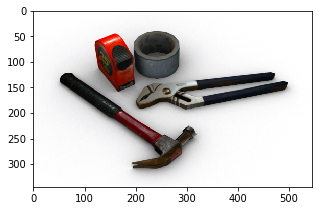

In [22]:
name='tools.jpg'
I=plt.imread(name)
plt.figure(figsize=(5,5)) # this line is not necessary, but allows you to control the size of the displayed image
plt.imshow(I)
plt.show() # this is necessary only if you want to display several images

a- What's the size of the image I? Its type? The type of the values it contains? What's its range? 

In [23]:
# complete this part. 
# Tip: look for numpy attributes (e.g. https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html) 
# and functions to do what you want (e.g. np.min)

print("The size of the image:",I.shape) #it's the size of I
print("The type of the image:",type(I)) #it's the type of I
print("Type of the contained values:",I.dtype) #it's the type of the values it contains
print("Dynamic range:",np.amin(I),':',np.amax(I)) #it's the range of the picture

The size of the image: (345, 546, 3)
The type of the image: <class 'numpy.ndarray'>
Type of the contained values: uint8
Dynamic range: 0 : 255


b- Here is a simple function to load an image and crop it according to a bounding box. Make sure you understand every line

In [24]:
def load_image_v0(name,crop_window=-1): 
    I=plt.imread(name)
    if crop_window!=-1:
        I=I[crop_window[0]:crop_window[1],crop_window[2]:crop_window[3]]
    I=I.astype('float')/255
    return I

#test:
#load_image_v0(name,crop_window=[1,400,50,100]): 
#    I=plt.imread(name)
#    if crop_window!=-1:
#        I=I[crop_window[0]:crop_window[1],crop_window[2]:crop_window[3]]
#    I=I.astype('float')/255
#    return I
#plt.imshow(load_image_v0("lena.jpg",crop_window=[1,300,0,700]))
#plt.show()

Use the function to display and save a grayscale version of the 100x50 pixels of the bottom left corner of 'lena'. 

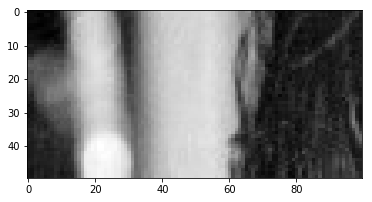

In [25]:
def RGB_to_grey(tuple):
    return np.dot(np.asarray(tuple),[0.2989,0.5870,0.1140])

Ibis=RGB_to_grey(load_image_v0("lena.jpg",crop_window=[462,512,0,100]))
plt.imshow(Ibis)
plt.show()
plt.imsave("lenabis.jpg", Ibis)

c- Modify the following function so that it can load an RGB image and convert it to a grayscale image using the formula L=0.2989 * R + 0.5870 * G + 0.1140 * B, where R, G and B are the three color channels of the color image and L is the luminance (i.e. the grayscale image). Include a test so that your function also works if the input image is grayscale.

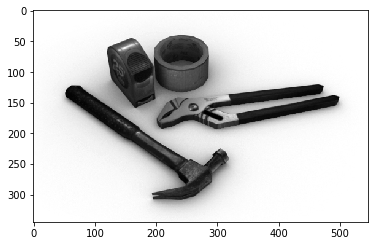

In [26]:
def est_gris(I):
    return (len(I[0][0])==4)

def load_image(name,crop_window=-1): 
    I=plt.imread(name)
    if est_gris(I):
        print("La photo est déjà grise")
        return I
    M=np.zeros((I.shape[0],I.shape[1]))
    M=RGB_to_grey(I)
    if crop_window!=-1:
        M=M[crop_window[0]:crop_window[1],crop_window[2]:crop_window[3]]
    M=M.astype('float')/255
    return M

I=load_image('tools.jpg')
plt.imshow(I)
plt.show()
plt.imsave("lena_grey.jpg", Ibis)

Use your function to load a grayscale version of lena and save it as a png image.

d- Here is an example of how to convolve an image with a Gaussian. What is the size of the output? What are the border conditions? Replace the border conditions with zero padding and comment on the result

(345, 546)


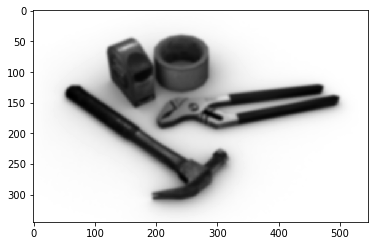

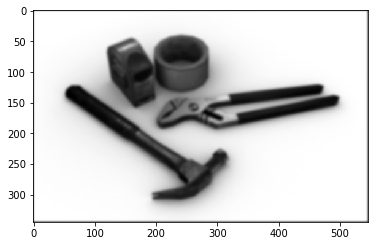

In [27]:
Ib=ndimage.gaussian_filter(I, sigma=2)

print(I.shape) #same size

#The border conditions are "reflect"

Ibprime=ndimage.gaussian_filter(I,sigma=2,mode='constant')

display_image(Ib)
display_image(Ibprime)

e- What does the following code do? What's its visual effect on the image?

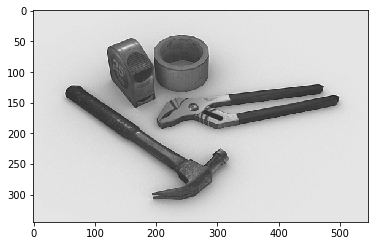

In [28]:
k = np.array([[-1./9, -1./9, -1./9],
               [-1./9, 17./9, -1./9],
               [-1./9, -1./9, -1./9]])
O=ndimage.convolve(I, k)

#Every pixel becomes more "important" than all of his neighbors, thus increasing the impression of details on the picture

display_image(O)

f- Write a function "compute_gradient" that returns three images containing the input image derivative along the horizontal direction, the vertical direction, and the gradient norm. It should use forward differences, and take an optional argument "sigma" that gives the scale of the derivative. What is the size of the output compared to the size of the input?

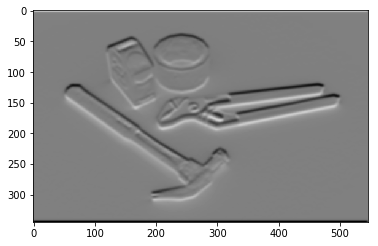

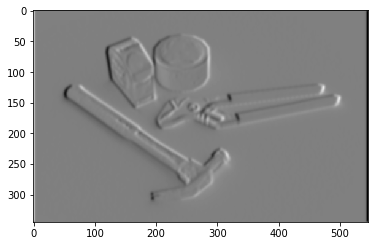

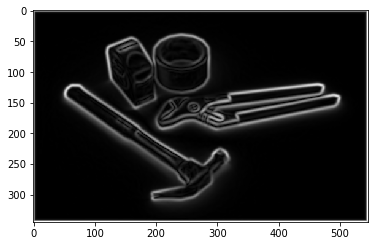

In [29]:
def compute_gradient(I,sigma=2):
    #hor=[1]+[0 for i in range(sigma)]+[-1]
    #hor=np.matrix(hor)
    #I_hor=ndimage.convolve(I,hor)
    #I_ver=ndimage.convolve(I,hor.transpose())
    I_hor=ndimage.gaussian_filter(I,sigma=sigma,order=(1,0),mode='constant')
    I_ver=ndimage.gaussian_filter(I,sigma=sigma,order=(0,1),mode='constant')
    I_grad=np.sqrt(I_hor*I_hor + I_ver*I_ver)
    return I_hor,I_ver,I_grad
I_hor,I_ver,I_grad=compute_gradient(I)
display_image(I_hor)
display_image(I_ver)
display_image(I_grad)

g- Visualize the three images returned by your function for different values of sigma. Comment.

The highest sigma is, the biggest the edges are and the worst the precision is, but we lose increasingly more noises

sigma is equal to 1


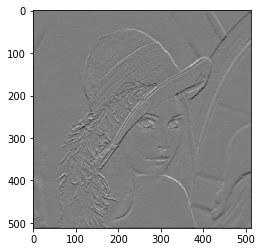

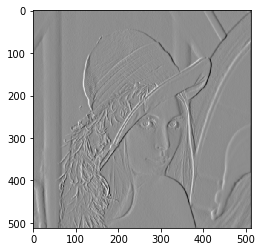

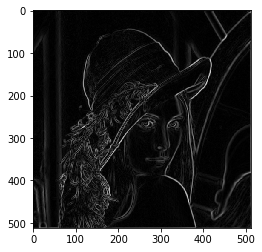

sigma is equal to 2


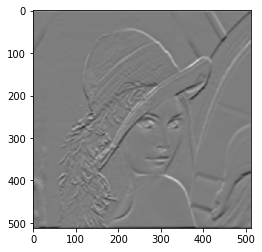

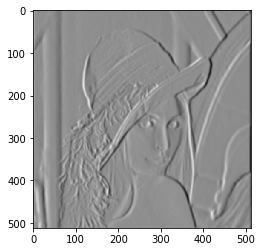

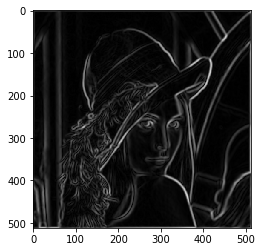

sigma is equal to 3


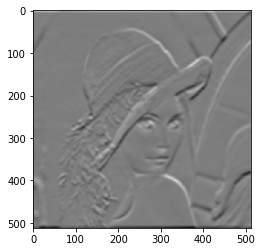

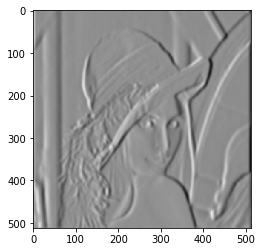

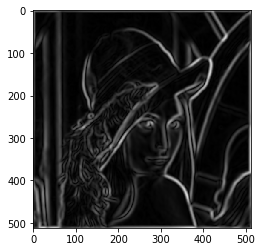

sigma is equal to 4


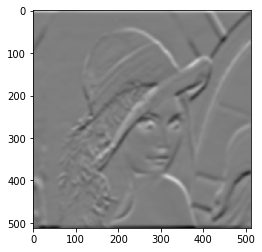

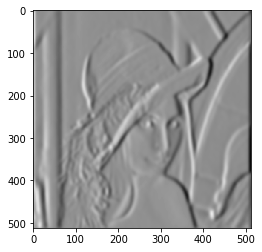

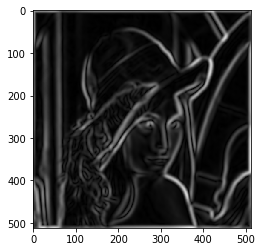

In [37]:
I_hor1,I_ver1,I_grad1 = compute_gradient(I,1)
I_hor2,I_ver2,I_grad2 = compute_gradient(I,2)
I_hor3,I_ver3,I_grad3 = compute_gradient(I,3)
I_hor4,I_ver4,I_grad4 = compute_gradient(I,4)

print("sigma is equal to 1")
display_image(I_hor1)
display_image(I_ver1)
display_image(I_grad1)
print("sigma is equal to 2")
display_image(I_hor2)
display_image(I_ver2)
display_image(I_grad2)
print("sigma is equal to 3")
display_image(I_hor3)
display_image(I_ver3)
display_image(I_grad3)
print("sigma is equal to 4")
display_image(I_hor4)
display_image(I_ver4)
display_image(I_grad4)

If you had difficulties to do this first part, it might be good to look at a few more examples before writting your own code. You can find many python tutorial for image processing online, for example http://www.scipy-lectures.org/advanced/image_processing/

## 2. Canny edges

a- Compute a binary image corresponding to thresholding the norm of the gradient. Discuss the parameters (there are two) and their influence of the results

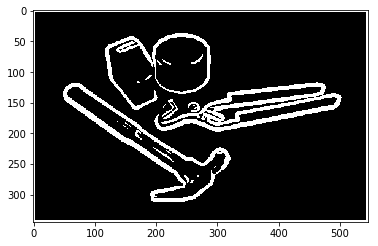

In [31]:
def treshold_gradient(I,sigma,th):
    _,_,I_grad=compute_gradient(I,sigma)
    (n,p)=I_grad.shape
    I_bis=np.zeros((n,p))
    for i in range(n):
        for j in range(p):
            if I_grad[i][j] > th:
                I_bis[i][j]=1
    return I_bis

I_bis=treshold_gradient(I,2,0.04)
display_image(I_bis)

# - The parameter $sigma$ is the same as seen above
# - The parameter $th$ is the treshold. The higher it is, the lower will be the level of brightness needed to shut a pixel off.

# Chosing wisely $sigma$ and $th$ would allow us to highlight the edges of our image

b- Write a function "nms(gradient_norm)" which takes as input the gradient norm and outputs a binary images with value 1 only for pixels that correspond to a maximum in the direction of the gradient.

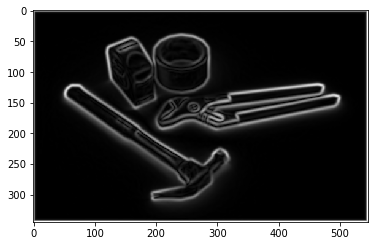

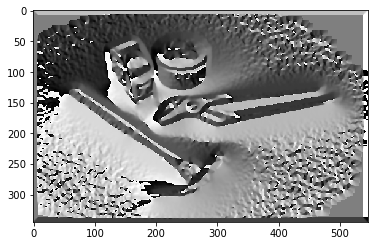

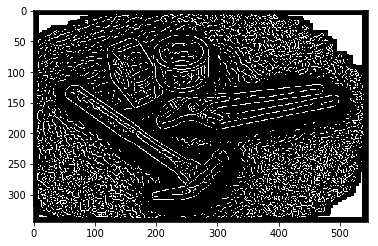

In [32]:
def round_angle(angle):
    if -9/8*np.pi <= angle < - 7/8*np.pi:
        return 0
    elif - 7/8*np.pi <= angle < -5/8*np.pi:
        return 1
    elif - 5/8*np.pi <= angle < -3/8*np.pi:
        return 2
    elif - 3/8*np.pi <= angle < -1/8*np.pi:
        return 3
    elif - 1/8*np.pi <= angle < 1/8*np.pi:
        return 0
    elif 1/8*np.pi <= angle < 3/8*np.pi:
        return 1
    elif 3/8*np.pi <= angle < 5/8*np.pi:
        return 2
    elif 5/8*np.pi <= angle < 7/8*np.pi:
        return 3      
    elif 7/8*np.pi <= angle < 9/8*np.pi:
        return 0



def nms(I, sigma):
    I_hor,I_ver,I_grad=compute_gradient(I,sigma)
    Dir=np.arctan2(I_hor,I_ver)
    line, column = I_grad.shape
    M = np.zeros((line,column), dtype=np.int32)
    for i in range(line-1):
        for j in range(column-1):
            where = round_angle(Dir[i, j])
            if where == 0:
                if (I_grad[i, j] >= I_grad[i, j - 1]) and (I_grad[i, j] >= I_grad[i, j + 1]):
                    M[i,j] = 1
            elif where == 1:
                if (I_grad[i, j] >= I_grad[i - 1, j]) and (I_grad[i, j] >= I_grad[i + 1, j]):
                    M[i,j] = 1
            elif where == 2:
                if (I_grad[i, j] >= I_grad[i - 1, j - 1]) and (I_grad[i, j] >= I_grad[i + 1, j + 1]):
                    M[i,j] = 1
            elif where == 3:
                if (I_grad[i, j] >= I_grad[i - 1, j + 1]) and (I_grad[i, j] >= I_grad[i + 1, j - 1]):
                    M[i,j] = 1
    return M,I_grad,Dir


#display_image(I)
M,I_grad,Dir=nms(I,2)
display_image(I_grad)
display_image(Dir)
display_image(M)
plt.imsave("gradienttools.png",M)

c- Combine 'a' and 'b' to extract edges with a gradient norm larger than a given threshold.

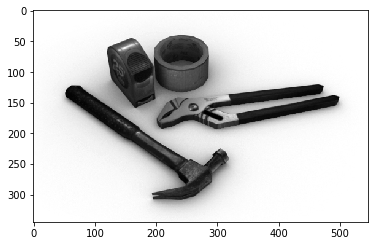

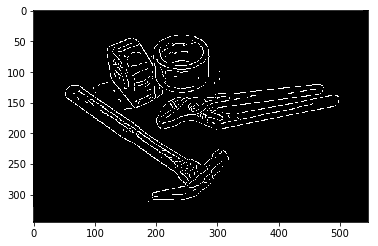

In [33]:
def c(I,th,sigma):
    M,I_grad,_ = nms(I,sigma)
    n,p=I_grad.shape
    O=np.zeros((n,p))
    for i in range(n):
        for j in range(p):
            if I_grad[i][j]<th:
                M[i][j]=0
    return M

display_image(I)
O=c(I,0.008,2)
plt.imsave("gradienttools2.png",O)
display_image(O)

d- Add the hysteresis thresholding to 'c' to implement a function computing the Canny esdges.

Here is one way to do the hysteresis thresholding. Keep a list of the edges for which you have to visit neighboors. Initialize the list with the edges corresponding to the most discriminative threshold. For each edge you are sure of (i.e. in the list), you have to check if its neighboors are considered edges using the less discriminative threshold. If they are, add them to the output edges and in the list of edges to visit.

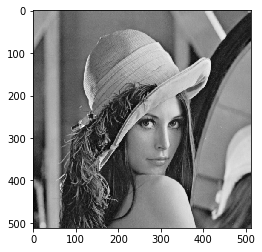

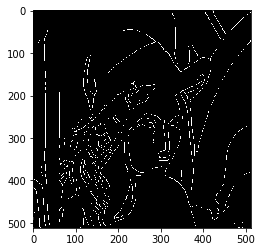

In [34]:
def voisin_present(L_max,i,j):
    if [i-1,j] in L_max:
        return True
    elif [i-1,j-1] in L_max:
        return True
    elif [i-1,j+1] in L_max:
        return True
    elif [i,j-1] in L_max:
        return True
    elif [i,j+1] in L_max:
        return True
    elif [i+1,j] in L_max:
        return True
    elif [i+1,j-1] in L_max:
        return True
    elif [i+1,j+1] in L_max:
        return True
    else:
        return False
    

def c_hyst(I,sigma,thd,thu):
    M,I_grad,Dir=nms(I,sigma)
    n,p=I_grad.shape
    O=np.zeros((n,p))
    OK=[]
    V=[]
    for i in range(n):
        for j in range(p):
            if M[i][j]==1 and I_grad[i][j]>=thu:
                O[i][j]=1
                OK.append((i,j))
            elif M[i][j]==1 and thu>I_grad[i][j]>=thd:
                V.append((i,j))
    for (i,j) in OK:
        if (i-1,j-1) in V:
            O[i-1][j-1]=1
            OK.append((i-1,j-1))
            V.remove((i-1,j-1))
        if (i-1,j) in V:
            O[i-1][j]=1
            OK.append((i-1,j))
            V.remove((i-1,j))
        if (i-1,j+1) in V:
            O[i-1][j+1]=1
            OK.append((i-1,j+1))
            V.remove((i-1,j+1))
        if (i,j+1) in V:
            O[i][j+1]=1
            OK.append((i,j+1))
            V.remove((i,j+1))
        if (i,j-1) in V:
            O[i][j-1]=1
            OK.append((i,j-1))
            V.remove((i,j-1))
        if (i+1,j-1) in V:
            O[i+1][j-1]=1
            OK.append((i+1,j-1))
            V.remove((i+1,j-1))
        if (i+1,j) in V:
            O[i+1][j]=1
            OK.append((i+1,j))
            V.remove((i+1,j))
        if (i+1,j+1) in V:
            O[i+1][j+1]=1
            OK.append((i+1,j+1))
            V.remove((i+1,j+1))
    return O
I=load_image('lena.jpg')
display_image(I)
O=c_hyst(I,3,0.001,0.02)
display_image(O)
plt.imsave("canny_lena.jpg",O)

e- Use your algorithm with different parameters and comment on their effects.

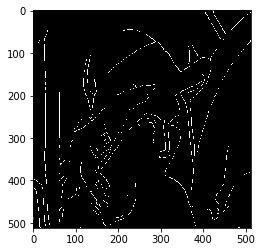

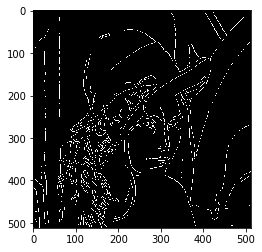

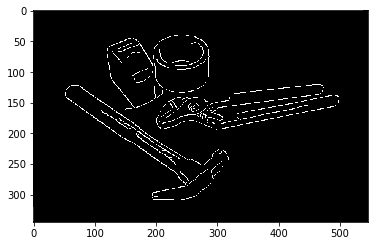

In [36]:
I = load_image("lena.jpg")
M = c_hyst(I,3,0.001,0.03)
display_image(M)
plt.imsave("canny_lena_3.jpg",M)

M = c_hyst(I,2,0.001,0.03)
display_image(M)
plt.imsave("canny_lena_2.jpg",M)

I2 = load_image("tools.jpg")
M = c_hyst(I2,2,0.01,0.03)
display_image(M)
plt.imsave("canny_tools.jpg",M)

In [ ]:
#The highest sigma is, the less noise there is, but the picture lose in accuracy.
#The lowest the lower threshold is, the more the details are conserved.
#The lowest the higher threshold is, the more chance we have to have "noises"